In [6]:
from functions.generate_data import generate_data
from functions import world
from functions import neural_network_keras
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
import numpy as np
import json
import datetime

# Generating test dataset

In [7]:
with open('conf.json') as f:
    conf = json.load(f)

In [9]:
# Generates new data and saves it into csv file
print("Generating new data!")
generate_data(conf["map"]["number_of_buoys"], conf["map"]["data_per_buoy"], 
              conf["map"]["world_width"], conf["map"]["world_height"])

# Convert data in csv file into numpy arrays
# Use pandas to handle csv file created
df = pd.read_csv('data_buoys.csv')
features = df.iloc[:, :10]
labels = df.iloc[:, 10:]

# Sets training and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(
        features, labels, test_size=0.20) # returns numpy.ndarray

# save variables for saving time next time they're needed
np.savez('data_arrays', X_train, Y_train, X_test, Y_test)

Generating new data!


# Training model

In [10]:
from functions import neural_network_keras

In [11]:
print ("Loading arrays from file")
npzfile = np.load('data_arrays.npz')

X_train, Y_train, X_test, Y_test = npzfile['arr_0'], npzfile['arr_1'], npzfile['arr_2'],npzfile['arr_3']

# print('X_train.shape = ' + str(X_train.shape))
# print('Y_train.shape = ' + str(Y_train.shape))
# print('X_test.shape = ' + str(X_test.shape))
# print('Y_test.shape = ' + str(Y_test.shape))
#print(type(Y_test[0][0]))
model = neural_network_keras.create_model_api()
neural_network_keras.train_model(X_train, Y_train, X_test, Y_test, model)

Loading arrays from file
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
activation_2 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 96        
_________________________________________________________________
activation_3 (Activation)    (None, 6)             

# Showing results

In [12]:
from functions import world
import os
import datetime

Results ready in /home/marti/git/FishFinder/out/2019225_203933


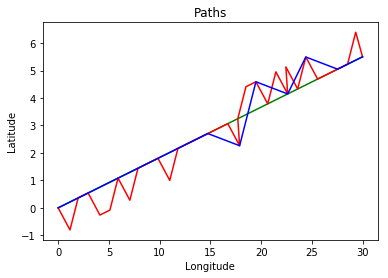

In [13]:
grid_parameters = world.create_grid(conf["map"]["start_x"], conf["map"]["start_y"],
                                    conf["map"]["end_x"], conf["map"]["end_y"], conf["map"]["displacement"])
paths, fish_list = world.create_path(conf["weights"], grid_parameters[0])

# create directory and save results

# graph
if not os.path.exists('out'):
    os.mkdir('out')
date = datetime.datetime.now()
dirname = str(date.year) + str(date.month) + str(date.day) + '_' + \
 str(date.hour) + str(date.minute) + str(date.second)
path_results = os.path.join(os.getcwd(), 'out', dirname)


world.show_grid(grid_parameters[1], conf["map"]["show_points"], paths, path_results)

# computations
boat_features = [conf["boat_features"]["avg_speed"], conf["boat_features"]["fuel_consumption"], \
conf["boat_features"]["fuel_consumption_turning"], conf["boat_features"]["time_consumption_turning"]]
world.compute_feedback_data(paths, fish_list, path_results, boat_features)

print('Results ready in ' + path_results)